# Lab Customer Analysis Round 2
For this lab, we will be using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using the Online Excel.

Note: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.

Dealing with the data
1. Show the dataframe shape.
2. Standardize header names.
3. Which columns are numerical?
4. Which columns are categorical?
5. Check and deal with NaN values.
6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
BONUS: Put all the previously mentioned data transformations into a function.

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np

# ensure that all cells are viewable
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

#read the csv file into a pandas dataframe

customers = pd.read_csv('C:/Users/Ish/Documents/Ironhack Bootcamp/Day 5/lab-customer-analysis-round-6/files_for_lab/csv_files/marketing_customer_analysis.csv') #index_col = [0])

# view the data frame
print(customers.head())

# view the shape of the dataframe
print(customers.shape)

  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    6

In [2]:
#view column header and standardize headers
cols= [col.lower() for col in customers.columns]
print(cols)
cols[7] = 'employment status'

#update column headers
customers.columns = cols
customers.head(3)


['customer', 'state', 'customer lifetime value', 'response', 'coverage', 'education', 'effective to date', 'employmentstatus', 'gender', 'income', 'location code', 'marital status', 'monthly premium auto', 'months since last claim', 'months since policy inception', 'number of open complaints', 'number of policies', 'policy type', 'policy', 'renew offer type', 'sales channel', 'total claim amount', 'vehicle class', 'vehicle size']


customer       state  customer lifetime value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   

  effective to date employment status gender  income location code  \
0           2/24/11          Employed      F   56274      Suburban   
1           1/31/11        Unemployed      F       0      Suburban   
2           2/19/11          Employed      F   48767      Suburban   

  marital status  monthly premium auto  months since last claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   

   months since policy inception  number of open complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   

   number of policies     policy type        policy renew offer type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   

  sales channel  total claim amount  vehicle class vehicle size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize

In [3]:
# determine which columns are numerical
print(customers.dtypes)

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employment status                 object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
dtype: object


In [4]:
# print the columns containing numerical data

#print('Numerical Data\n',customers._get_numeric_data().T.head())

# print the columns containing categorical data
print('Categorical Data\n',customers.select_dtypes('object').T.head())

Categorical Data
                  0         1         2           3           4         5     \
customer      BU79786   QZ44356   AI49188     WW63253     HB64268   OC83172   
state      Washington   Arizona    Nevada  California  Washington    Oregon   
response           No        No        No          No          No       Yes   
coverage        Basic  Extended   Premium       Basic       Basic     Basic   
education    Bachelor  Bachelor  Bachelor    Bachelor    Bachelor  Bachelor   

              6        7         8         9           10          11    \
customer   XZ87318  CF85061   DY87989   BQ94931     SX51350     VQ65197   
state       Oregon  Arizona    Oregon    Oregon  California  California   
response       Yes       No       Yes        No          No          No   
coverage     Basic  Premium     Basic  Extended       Basic       Basic   
education  College   Master  Bachelor   College     College     College   

                 12                    13          14   

In [5]:
# check for NaN values in the dataset
# determine numbers of null values by column
print('Data before removing empty rows:\n',customers.shape)
na_percent_df = pd.DataFrame(round(customers.isna().sum()/len(customers),4)*100)
na_percent_df.columns = ['PercentNaNs']
print(na_percent_df)

Data before removing empty rows:
 (9134, 24)
                               PercentNaNs
customer                               0.0
state                                  0.0
customer lifetime value                0.0
response                               0.0
coverage                               0.0
education                              0.0
effective to date                      0.0
employment status                      0.0
gender                                 0.0
income                                 0.0
location code                          0.0
marital status                         0.0
monthly premium auto                   0.0
months since last claim                0.0
months since policy inception          0.0
number of open complaints              0.0
number of policies                     0.0
policy type                            0.0
policy                                 0.0
renew offer type                       0.0
sales channel                          0.0
total cla

In [6]:
# the column 'vehicle type' is missing more than 50% of values. This column should therefore be dropped.
# customers = customers.drop(['vehicle type'], axis = 1)

In [7]:
# There are six volumns with an average of 5.76% null values.
# Rather than dropping this data it might be a better to replace the NaN values

# Replace null values for 'state'
most_common_state = customers['state'].mode()
most_common_state
customers['state'] = customers['state'].fillna(most_common_state[0])

# Replace null values for 'response'
most_common_response = customers['response'].mode()
customers['response'] = customers['response'].fillna(most_common_response[0])

#Replace null values for 'months since last claim'
most_common_mslc = customers['months since last claim'].mode()
customers['months since last claim'] = customers['months since last claim'].fillna(most_common_mslc[0])

#Replace null values for 'number of open complaints'
most_common_nooc = customers['number of open complaints'].mode()
customers['number of open complaints'] = customers['number of open complaints'].fillna(most_common_nooc[0])

# Replace null values for 'vehicle class'
most_common_v_class = customers['vehicle class'].mode()
customers['vehicle class'] = customers['vehicle class'].fillna(most_common_v_class[0])

# Replace null values for 'vehicle size'
most_common_v_size = customers['vehicle size'].mode()
customers['vehicle size'] = customers['vehicle size'].fillna(most_common_v_size[0])

na_percent_df = pd.DataFrame(round(customers.isna().sum()/len(customers),4)*100)
na_percent_df


0
customer                       0.0
state                          0.0
customer lifetime value        0.0
response                       0.0
coverage                       0.0
education                      0.0
effective to date              0.0
employment status              0.0
gender                         0.0
income                         0.0
location code                  0.0
marital status                 0.0
monthly premium auto           0.0
months since last claim        0.0
months since policy inception  0.0
number of open complaints      0.0
number of policies             0.0
policy type                    0.0
policy                         0.0
renew offer type               0.0
sales channel                  0.0
total claim amount             0.0
vehicle class                  0.0
vehicle size                   0.0

In [8]:
# Date Time Format
# select months from the 'effective to date' column and store as a separate column

# convert date columne to date time format
customers['effective to date'] = pd.to_datetime(customers['effective to date'])
#customers['effective to date'].head(25)

# create a list of values from the datetime column
months = list()
for date in customers['effective to date']:
    months.append(date.month)

#create column of months using stored datetime month values
customers['month'] = months

#define function to convert numerical months to strings
#def mon_stringer(m):
#    months_s = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#    m = months_s[m-1]
#    return m

#convert 'month' values to strings
#customers['month'] = customers['month'].apply(lambda x: mon_stringer(x))

# filter values by the first quarter.
#customers_first_quarter = customers[customers['month'].isin(['January','February','March'])].sort_values(by = 'month', ascending=False)
customers_first_quarter = customers[customers['month'].isin([0,1,2])].sort_values(by = 'month', ascending=False)
print(customers_first_quarter.head())
print(customers_first_quarter.tail())

     customer       state  customer lifetime value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
4993  LY90785      Oregon              5793.157728       No     Basic   
4989  SN67992  Washington              3449.494119       No  Extended   
4987  BR69566      Oregon             14019.833140       No     Basic   
4986  VK98184     Arizona              5033.693296       No  Extended   

     education effective to date employment status gender  income  \
0     Bachelor        2011-02-24          Employed      F   56274   
4993  Bachelor        2011-02-06          Employed      M   95733   
4989  Bachelor        2011-02-04     Medical Leave      F   25236   
4987   College        2011-02-18          Employed      M   31739   
4986   College        2011-02-19          Employed      F   77031   

     location code marital status  monthly premium auto  \
0         Suburban        Married                    69   
4993      Suburban        Ma

#Lab Customer Analysis Round 3

For this lab, we still keep using the marketing_customer_analysis.csv file. You can find the file in the files_for_lab folder.

Get the data

Use the same jupyter file from the last lab, Customer Analysis Round 3

EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
1. Show DataFrame info.
2. Describe DataFrame.
3. Show a plot of the total number of responses.
4. Show a plot of the response rate by the sales channel.
5. Show a plot of the response rate by the total claim amount.
6. Show a plot of the response rate by income.

In [9]:
# Show Dataframe information with the df.describe()
# Dataframe transposed for readability.
print('Numeric Data:\n', customers.describe().T)
#print('Non Numeric Data:\n', customers.describe(include = [np.object]).T)

Numeric Data:
                                 count          mean           std  \
customer lifetime value        9134.0   8004.940475   6870.967608   
income                         9134.0  37657.380009  30379.904734   
monthly premium auto           9134.0     93.219291     34.407967   
months since last claim        9134.0     15.097000     10.073257   
months since policy inception  9134.0     48.064594     27.905991   
number of open complaints      9134.0      0.384388      0.910384   
number of policies             9134.0      2.966170      2.390182   
total claim amount             9134.0    434.088794    290.500092   
month                          9134.0      1.463762      0.498712   

                                       min          25%           50%  \
customer lifetime value        1898.007675  3994.251794   5780.182197   
income                            0.000000     0.000000  33889.500000   
monthly premium auto             61.000000    68.000000     83.000000   
mo

In [10]:
#import necessary libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

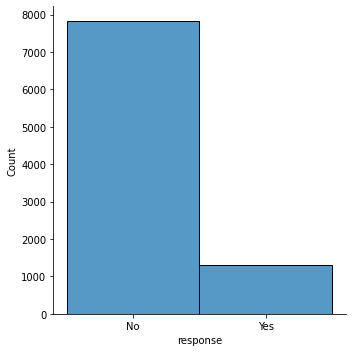

In [11]:
# plot total number of responses
dist_response = sns.displot(customers['response'])
dist_response


In [12]:
# define a function to return a numerical value of the rate of the responses.
"""def rate(df):
    Yes = []
    No = []
    for x in df['response']:
        if x == "Yes":
            Yes.append(x)
        else:
            No.append(x)
    yes_rates = len(Yes)/len(df['response'])
    no_rates =  len(No)/len(df['response'])
    return yes_rates, no_rates
"""
# create a function that converts Yes and No values to 1 or 0 values

def response_rate(x):
    if x == 'No':
        return 0
    else:
        return 1



In [13]:
# create a new column for the response rate
# response rate will be the numeric values corresponding to Yes or No from 0 to 1.
customers['response rate'] = customers['response'].apply(lambda x: response_rate(x))

customers['response rate'].value_counts()
#customers['response rate'].tail(25)


0    7826
1    1308
Name: response rate, dtype: int64

<AxesSubplot:xlabel='sales channel', ylabel='response rate'>

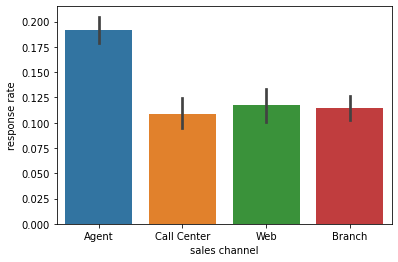

In [14]:
#plot of the response rate by the sales channel.
sns.barplot(y = 'response rate', x = 'sales channel', data = customers,)

<AxesSubplot:xlabel='response rate', ylabel='total claim amount'>

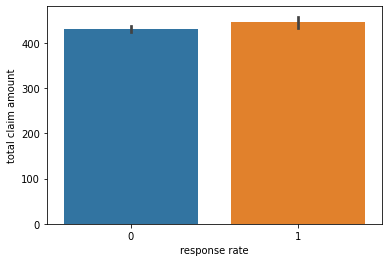

In [15]:
# plot the response rate by the total claim amount.
response_by_total_claim = sns.barplot(x = 'response rate', y = 'total claim amount', data = customers)
response_by_total_claim

<AxesSubplot:xlabel='response rate', ylabel='income'>

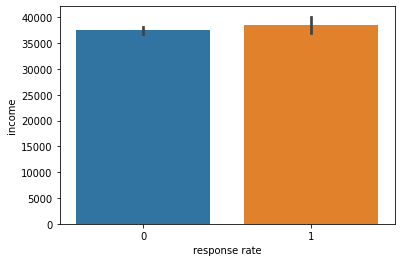

In [16]:
#plot the response rate by income.
response_rate_by_income = sns.barplot(x = 'response rate', y = 'income', data = customers)
response_rate_by_income




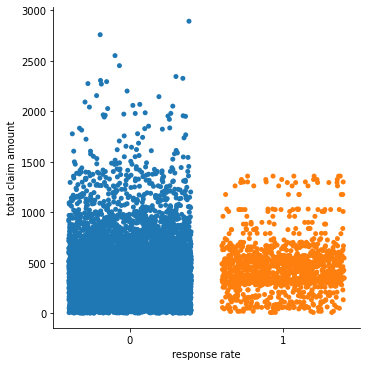

In [17]:
#plot the response rate by income. (Thanks Ines!)
response_rate_by_total_claim2 = sns.catplot(x="response rate",y="total claim amount", data=customers,jitter="0.4")
response_rate_by_total_claim2

# Lab | Customer Analysis Round 4
In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the marketing_customer_analysis.csv file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the files_for_lab folder.

1. Get the data
Use the jupyter file from the last lab (Customer Analysis Round 3)

## Complete the following tasks
1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
2. Now we will try to check the normality of the numerical variables visually
Use seaborn library to construct distribution plots for the numerical variables
Use Matplotlib to construct histograms
3. Do the distributions for different numerical variables look like a normal distribution
For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [18]:
# Check column data types once more.
print(customers.dtypes)

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employment status                        object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                   int64
months since policy inception             int64
number of open complaints                 int64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [19]:
# assign numerical data to new dataframe
numericals = customers._get_numeric_data()
print(numericals.dtypes)

# assign categorical data to new dataframe
categoricals = customers.select_dtypes('object')
print(categoricals.dtypes)

customer lifetime value          float64
income                             int64
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
total claim amount               float64
month                              int64
response rate                      int64
dtype: object
customer             object
state                object
response             object
coverage             object
education            object
employment status    object
gender               object
location code        object
marital status       object
policy type          object
policy               object
renew offer type     object
sales channel        object
vehicle class        object
vehicle size         object
dtype: object


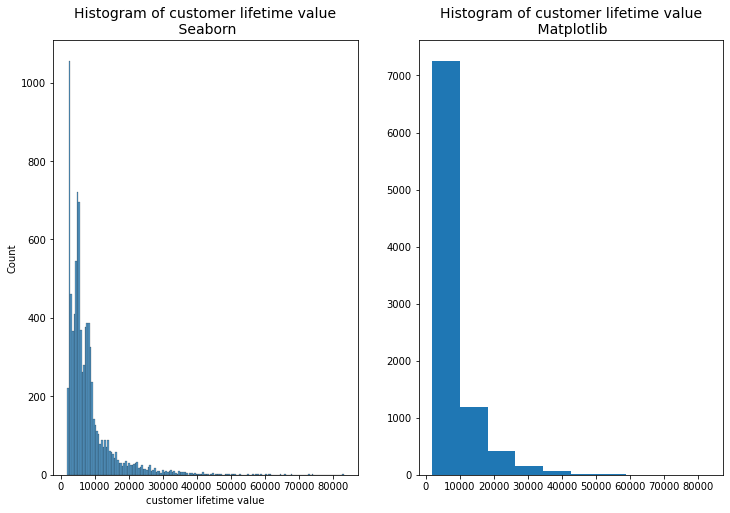

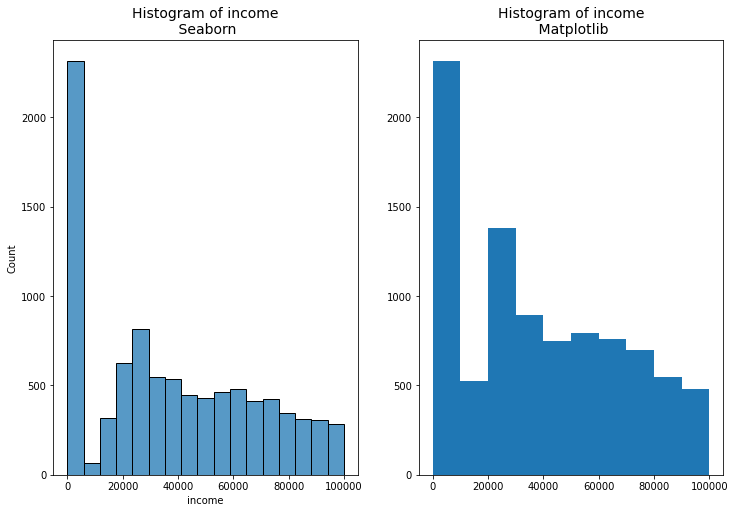

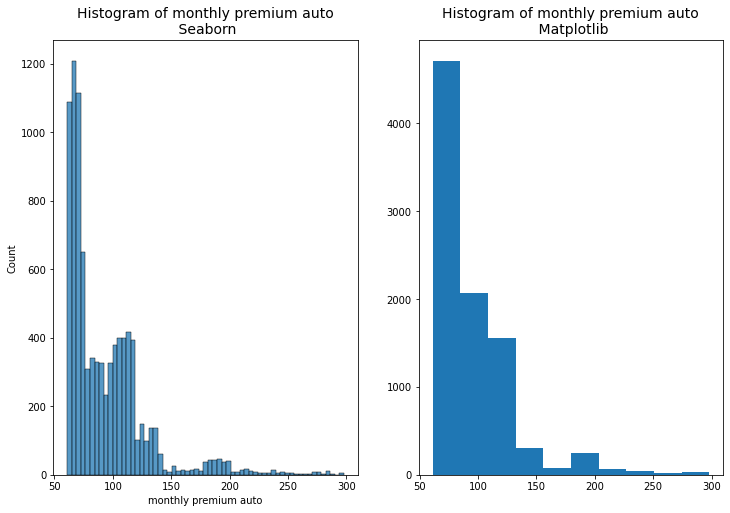

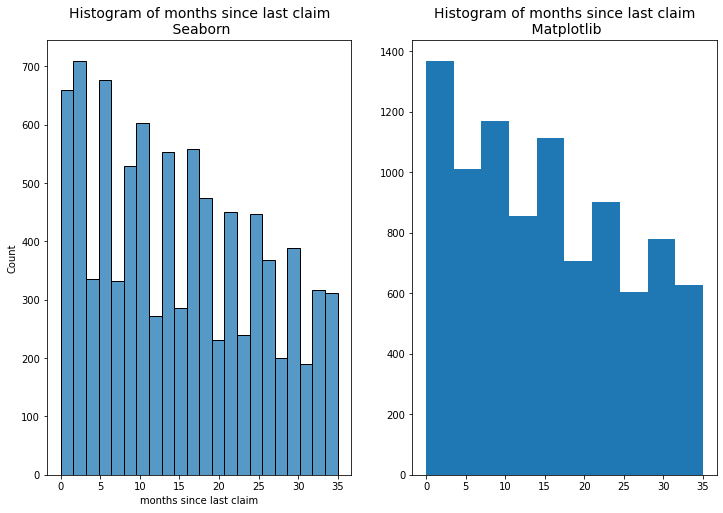

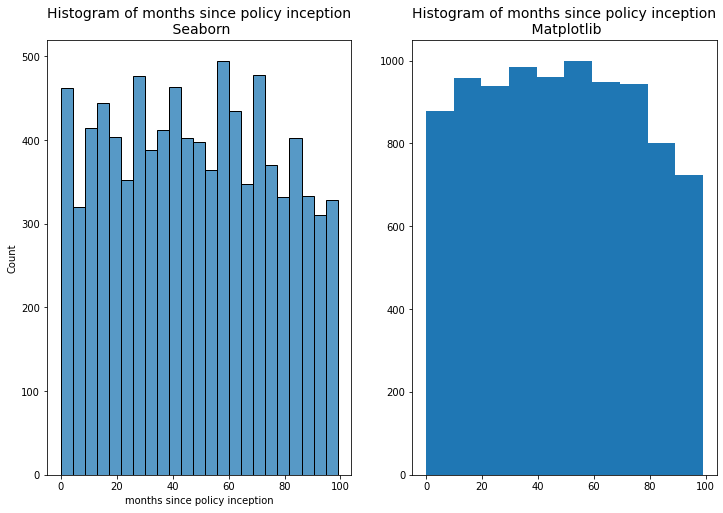

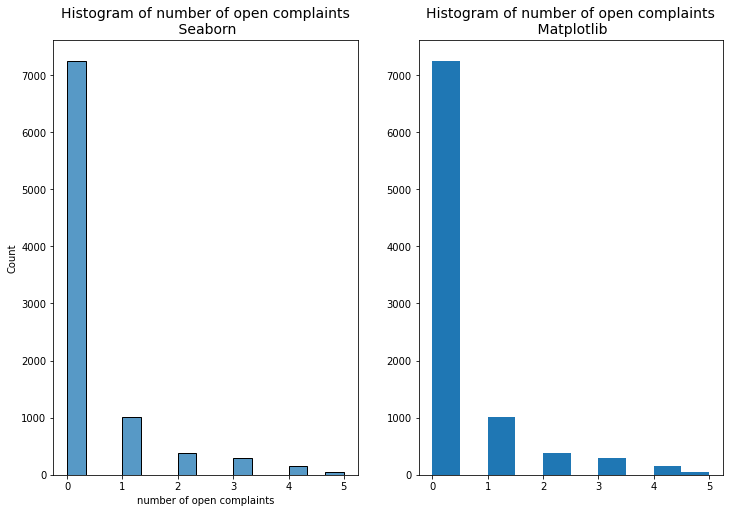

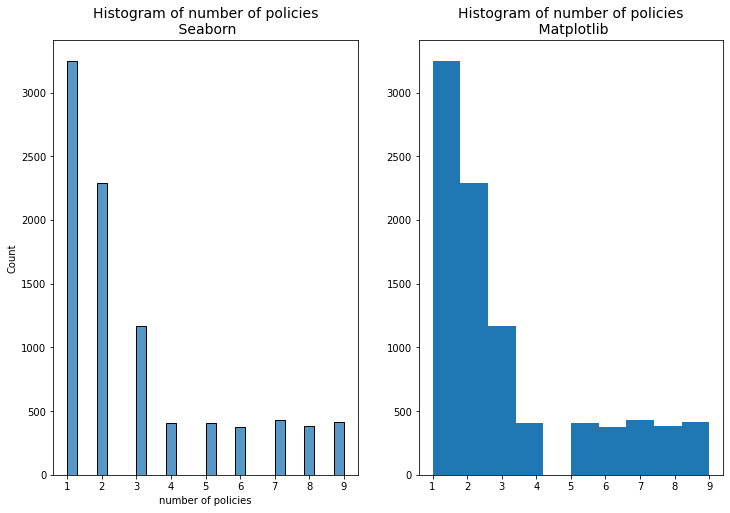

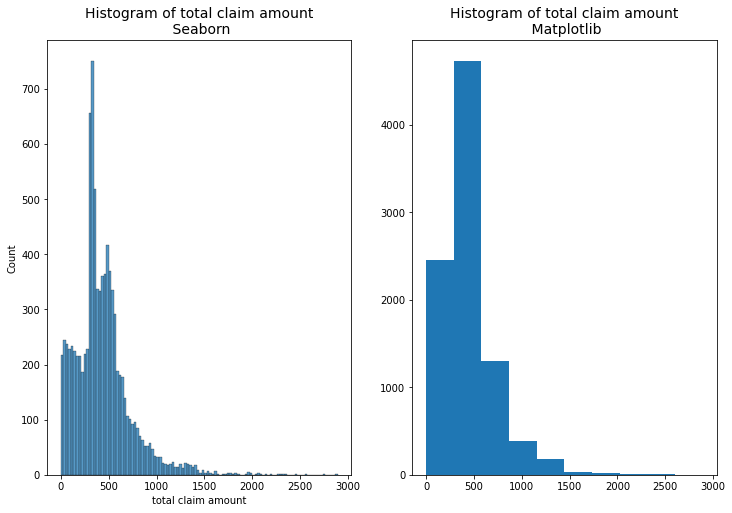

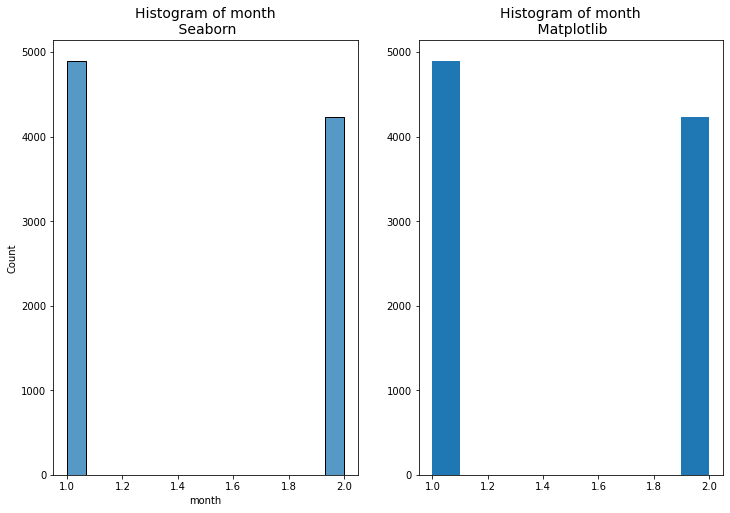

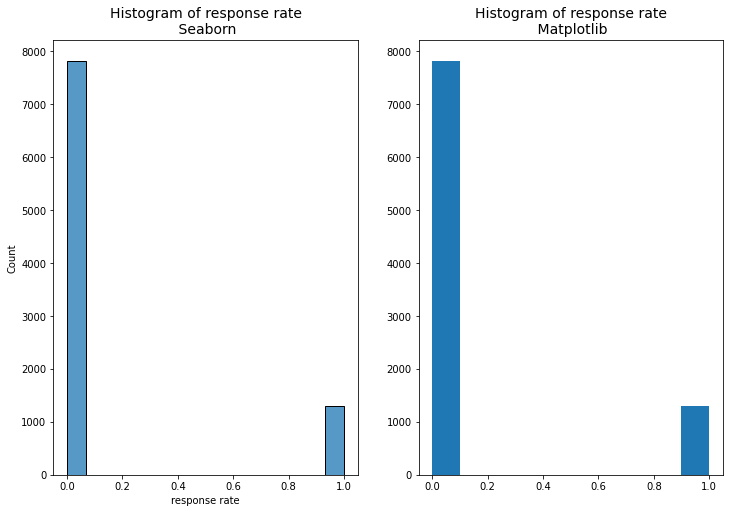

In [20]:
#check the distribution of the numerical variables using seaborn and matplotlib libraries to construct histograms plots.
for c in numericals:
     fig, axes = plt.subplots(1,2, figsize = (12,8))
     sns.histplot(ax = axes[0], x=c, data = numericals)
     axes[1].hist(x = numericals[c])
     axes[0].set_title(f'Histogram of {c}\n Seaborn', fontsize = 14)
     axes[1].set_title(f'Histogram of {c}\n Matplotlib', fontsize= 14)
     plt.show()


<AxesSubplot:>

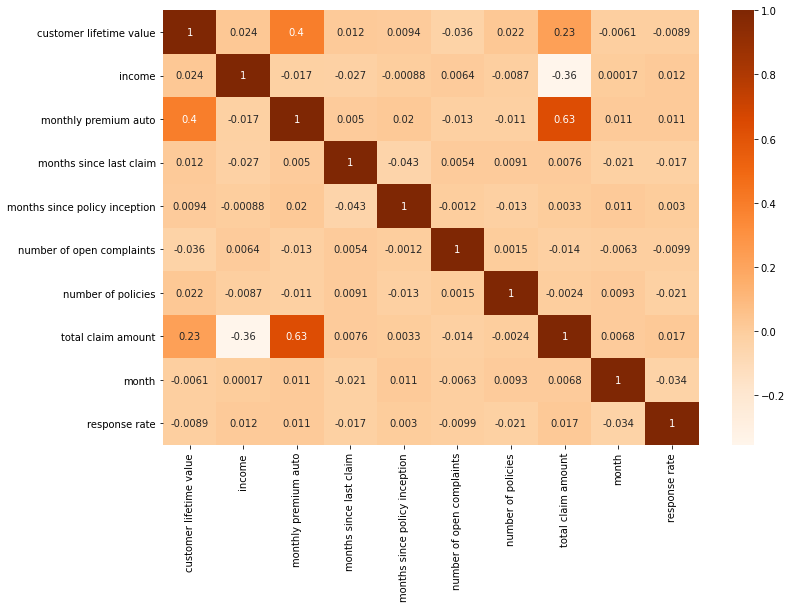

In [21]:
# Check for the collinearity between features in customers_num
fig = plt.figure(figsize=(12,8))
correlation_matrix = numericals.corr()
heatmap = sns.heatmap(correlation_matrix, cmap = 'Oranges', annot=True)
heatmap

In [22]:
# There do not appear to be any collinear features.

# Lab | Customer Analysis Round 5

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in the round 2.

### Explore the data

Done in the round 3.

### Processing Data

(_Further processing..._)

- X-y split.
- Normalize (numerical).

In [23]:
# import the libraries for normalizing data.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [24]:
# split numerical data into features X and labels y dataframes
y_numericals = numericals['total claim amount']
X_numericals = numericals.drop(['total claim amount'],axis = 1)

In [25]:
# normalize the numerical data by creating a recallable transformer trained on the data

MnMxTransformer = MinMaxScaler().fit(X_numericals)
X_norms = pd.DataFrame(MnMxTransformer.transform(X_numericals), columns = X_numericals.columns)
print(X_norms.head())


   customer lifetime value    income  monthly premium auto  \
0                 0.010629  0.562847              0.033755   
1                 0.062406  0.000000              0.139241   
2                 0.134960  0.487763              0.198312   
3                 0.070589  0.000000              0.189873   
4                 0.011245  0.438443              0.050633   

   months since last claim  months since policy inception  \
0                 0.914286                       0.050505   
1                 0.371429                       0.424242   
2                 0.514286                       0.383838   
3                 0.514286                       0.656566   
4                 0.342857                       0.444444   

   number of open complaints  number of policies  month  response rate  
0                        0.0               0.000    1.0            0.0  
1                        0.0               0.875    0.0            0.0  
2                        0.0             

In [26]:
# standardize the data with StandardSCaler
StandardTransformer = StandardScaler().fit(X_numericals)
X_stands = pd.DataFrame(StandardTransformer.transform(X_numericals), columns = X_numericals.columns)
print(X_stands.head())


   customer lifetime value    income  monthly premium auto  \
0                -0.762878  0.612827             -0.703925   
1                -0.149245 -1.239617              0.022691   
2                 0.710636  0.365710              0.429596   
3                -0.052263 -1.239617              0.371467   
4                -0.755575  0.203390             -0.587666   

   months since last claim  months since policy inception  \
0                 1.678099                      -1.543287   
1                -0.208186                      -0.217334   
2                 0.288205                      -0.360680   
3                 0.288205                       0.606907   
4                -0.307465                      -0.145661   

   number of open complaints  number of policies     month  response rate  
0                   -0.42225           -0.822648  1.075304      -0.408822  
1                   -0.42225            2.106160 -0.929969      -0.408822  
2                   -0.42225    

In [27]:
'''# view distribution of normalized features
fig = plt.figure(figsize = (10,6))
for c in X_norms:
     sns.histplot(x=c, data = X_norms)
     plt.title(f'Histogram of {c}\n', fontsize = 14)
     plt.show()
'''

"# view distribution of normalized features\nfig = plt.figure(figsize = (10,6))\nfor c in X_norms:\n     sns.histplot(x=c, data = X_norms)\n     plt.title(f'Histogram of {c}\n', fontsize = 14)\n     plt.show()\n"



# Lab | Customer Analysis Round 6

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in the round 2.

### Explore the data

Done in the round 3.

### Processing Data

(_Further processing..._)

- X-y split. (_done_)
- Normalize (numerical). (_done_)
- One Hot/Label Encoding (categorical).
- Concat DataFrames

### Linear Regression

- Train-test split.
- Apply linear regression.

### Model Validation

- Description:
  - R2.
  - MSE.
  - RMSE.
  - MAE.


In [28]:
# Import One Hot Encoder and Label Encoder classes from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 

# encode categorical variables using One Hot or Label Encoding (categorical).
categoricals.describe()

for col in categoricals:
    print(f'{col}:\n', categoricals[col].value_counts())

customer:
 BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
DB50188    1
DG23204    1
JS64688    1
IW56740    1
AQ30231    1
AK44985    1
FX55409    1
BK76107    1
AY26056    1
QR36329    1
GF70857    1
MU97512    1
OH98172    1
PD22502    1
US36532    1
JR84006    1
FN66436    1
YX84828    1
JH94846    1
TX73398    1
RX45809    1
RN86953    1
NX32730    1
RZ50353    1
QP32003    1
WN91943    1
BR24590    1
UI57491    1
UJ70796    1
QE46704    1
XF94560    1
VQ82774    1
EO87464    1
CR86548    1
XO11574    1
DM34321    1
WH56217    1
BV55733    1
PK37121    1
UF49068    1
FL55134    1
CH20044    1
NU57274    1
CV63337    1
GY87675    1
OH93496    1
AY99324    1
OL48469    1
OA26316    1
HZ64168    1
CR20811    1
FT79229    1
EI17753    1
EV15646    1
FF38892    1
PP35705    1
FQ24781    1
XT55646    1
QF69163    1
JH30819    1
YV88022    1
VF57165    1
AZ36763    1
FL50532    1
JP88955    1
AD33971    1
ES88339    1
NT79981    1
KO73340    1
LT98784    1
OQ45659    1
Z

In [29]:
# create dataframe of featuress with 5 or less unique categories
drop_cats = []
for cols in categoricals:
    if len(categoricals[cols].value_counts()) > 5:
        drop_cats.append(cols)
new_categoricals = categoricals.drop(drop_cats, axis = 1)


In [30]:
# encode categorical data with OneHot Encoding
# create encoder object
cat_encoder = OneHotEncoder().fit(new_categoricals)

# create array of transformed categorical data
cats_encoded = cat_encoder.transform(new_categoricals).toarray()
cats_encoded


array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [31]:
# create a loop to populate a list with appropriate category names as column headers
cat_cols = []
for columns in cat_encoder.categories_:
    for column_header in columns:
        cat_cols.append(column_header)


In [32]:
# create a new dataframe from the array, with the appropriate header names
cat_encoded = pd.DataFrame(cats_encoded, columns = cat_cols)
cat_encoded.head()


Arizona  California  Nevada  Oregon  Washington   No  Yes  Basic  Extended  \
0      0.0         0.0     0.0     0.0         1.0  1.0  0.0    1.0       0.0   
1      1.0         0.0     0.0     0.0         0.0  1.0  0.0    0.0       1.0   
2      0.0         0.0     1.0     0.0         0.0  1.0  0.0    0.0       0.0   
3      0.0         1.0     0.0     0.0         0.0  1.0  0.0    1.0       0.0   
4      0.0         0.0     0.0     0.0         1.0  1.0  0.0    1.0       0.0   

   Premium  Bachelor  College  Doctor  High School or Below  Master  Disabled  \
0      0.0       1.0      0.0     0.0                   0.0     0.0       0.0   
1      0.0       1.0      0.0     0.0                   0.0     0.0       0.0   
2      1.0       1.0      0.0     0.0                   0.0     0.0       0.0   
3      0.0       1.0      0.0     0.0                   0.0     0.0       0.0   
4      0.0       1.0      0.0     0.0                   0.0     0.0       0.0   

   Employed  Medical Leave  Retired  Unemployed    F    M  Rural  Suburban  \
0       1.0            0.0      0.0         0.0  1.0  0.0    0.0       1.0   
1       0.0            0.0      0.0         1.0  1.0  0.0    0.0       1.0   
2       1.0            0.0      0.0         0.0  1.0  0.0    0.0       1.0   
3       0.0            0.0      0.0         1.0  0.0  1.0    0.0       1.0   
4       1.0            0.0      0.0         0.0  0.0  1.0    1.0       0.0   

   Urban  Divorced  Married  Single  Corporate Auto  Personal Auto  \
0    0.0       0.0      1.0     0.0             1.0            0.0   
1    0.0       0.0      0.0     1.0             0.0            1.0   
2    0.0       0.0      1.0     0.0             0.0            1.0   
3    0.0       0.0      1.0     0.0             1.0            0.0   
4    0.0       0.0      0.0     1.0             0.0            1.0   

   Special Auto  Offer1  Offer2  Offer3  Offer4  Agent  Branch  Call Center  \
0           0.0     1.0     0.0     0.0     0.0    1.0     0.0          0.0   
1           0.0     0.0     0.0     1.0     0.0    1.0     0.0          0.0   
2           0.0     1.0     0.0     0.0     0.0    1.0     0.0          0.0   
3           0.0     1.0     0.0     0.0     0.0    0.0     0.0          1.0   
4           0.0     1.0     0.0     0.0     0.0    1.0     0.0          0.0   

   Web  Large  Medsize  Small  
0  0.0    0.0      1.0    0.0  
1  0.0    0.0      1.0    0.0  
2  0.0    0.0      1.0    0.0  
3  0.0    0.0      1.0    0.0  
4  0.0    0.0      1.0    0.0

In [69]:
# concatenate columns into single dataframe for train test split
encoded_customer_data = pd.concat([X_norms, cat_encoded], axis = 1)
encoded_customer_data.head()

# concatenate columns into a single dataframe with standardized numericals
encoded_customer_data2 = pd.concat([X_stands, cat_encoded], axis = 1)
encoded_customer_data2.head()
encoded_customer_data.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'month',
       'response rate', 'Arizona', 'California', 'Nevada', 'Oregon',
       'Washington', 'No', 'Yes', 'Basic', 'Extended', 'Premium', 'Bachelor',
       'College', 'Doctor', 'High School or Below', 'Master', 'Disabled',
       'Employed', 'Medical Leave', 'Retired', 'Unemployed', 'F', 'M', 'Rural',
       'Suburban', 'Urban', 'Divorced', 'Married', 'Single', 'Corporate Auto',
       'Personal Auto', 'Special Auto', 'Offer1', 'Offer2', 'Offer3', 'Offer4',
       'Agent', 'Branch', 'Call Center', 'Web', 'Large', 'Medsize', 'Small'],
      dtype='object')

In [34]:
# train test split

# import train test split class
from sklearn.model_selection import train_test_split

# assign data for splitting
X = encoded_customer_data
y = y_numericals

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.2, random_state = 42)

In [36]:
# import linear model and evaluation classes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
# instantiate and train model on training data
Lr1 = LinearRegression()
Lr1.fit(X_train, y_train)

# make predictions
predicted_vals = Lr1.predict(X_train)

# validate model on training data
r2 = r2_score(y_train,predicted_vals)
rmse =  sqrt(mean_squared_error(y_train, predicted_vals))

print(r2)
print(rmse)


0.7724933857194529
139.51188130047592


In [37]:
# test data and validate model on tested data

# predict using test data
test_results = Lr1.predict(X_test)

# evaluate model performance
test_r2 = r2_score(y_test, test_results)
test_rsme = sqrt(mean_squared_error(y_test, test_results))

# View model scores
print(test_r2)
print(test_rsme)


0.7631935226496568
137.21781762897484


# Lab | Customer Analysis Round 7

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise.
Some approaches you can try in this exercise:

- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in rounds 2 to 7.

**Bonus**: Build a function, from round 2 and round 7, to clean and process the data.

### Explore the data

Done in the round 3.

### Modeling

Description:

- Try to improve the linear regression model.


# REFINING THE MODEL
In this section try to refine the model by applying some different scaling or normalization options to the data.
Also try to select only the most significant features for training.

<AxesSubplot:>

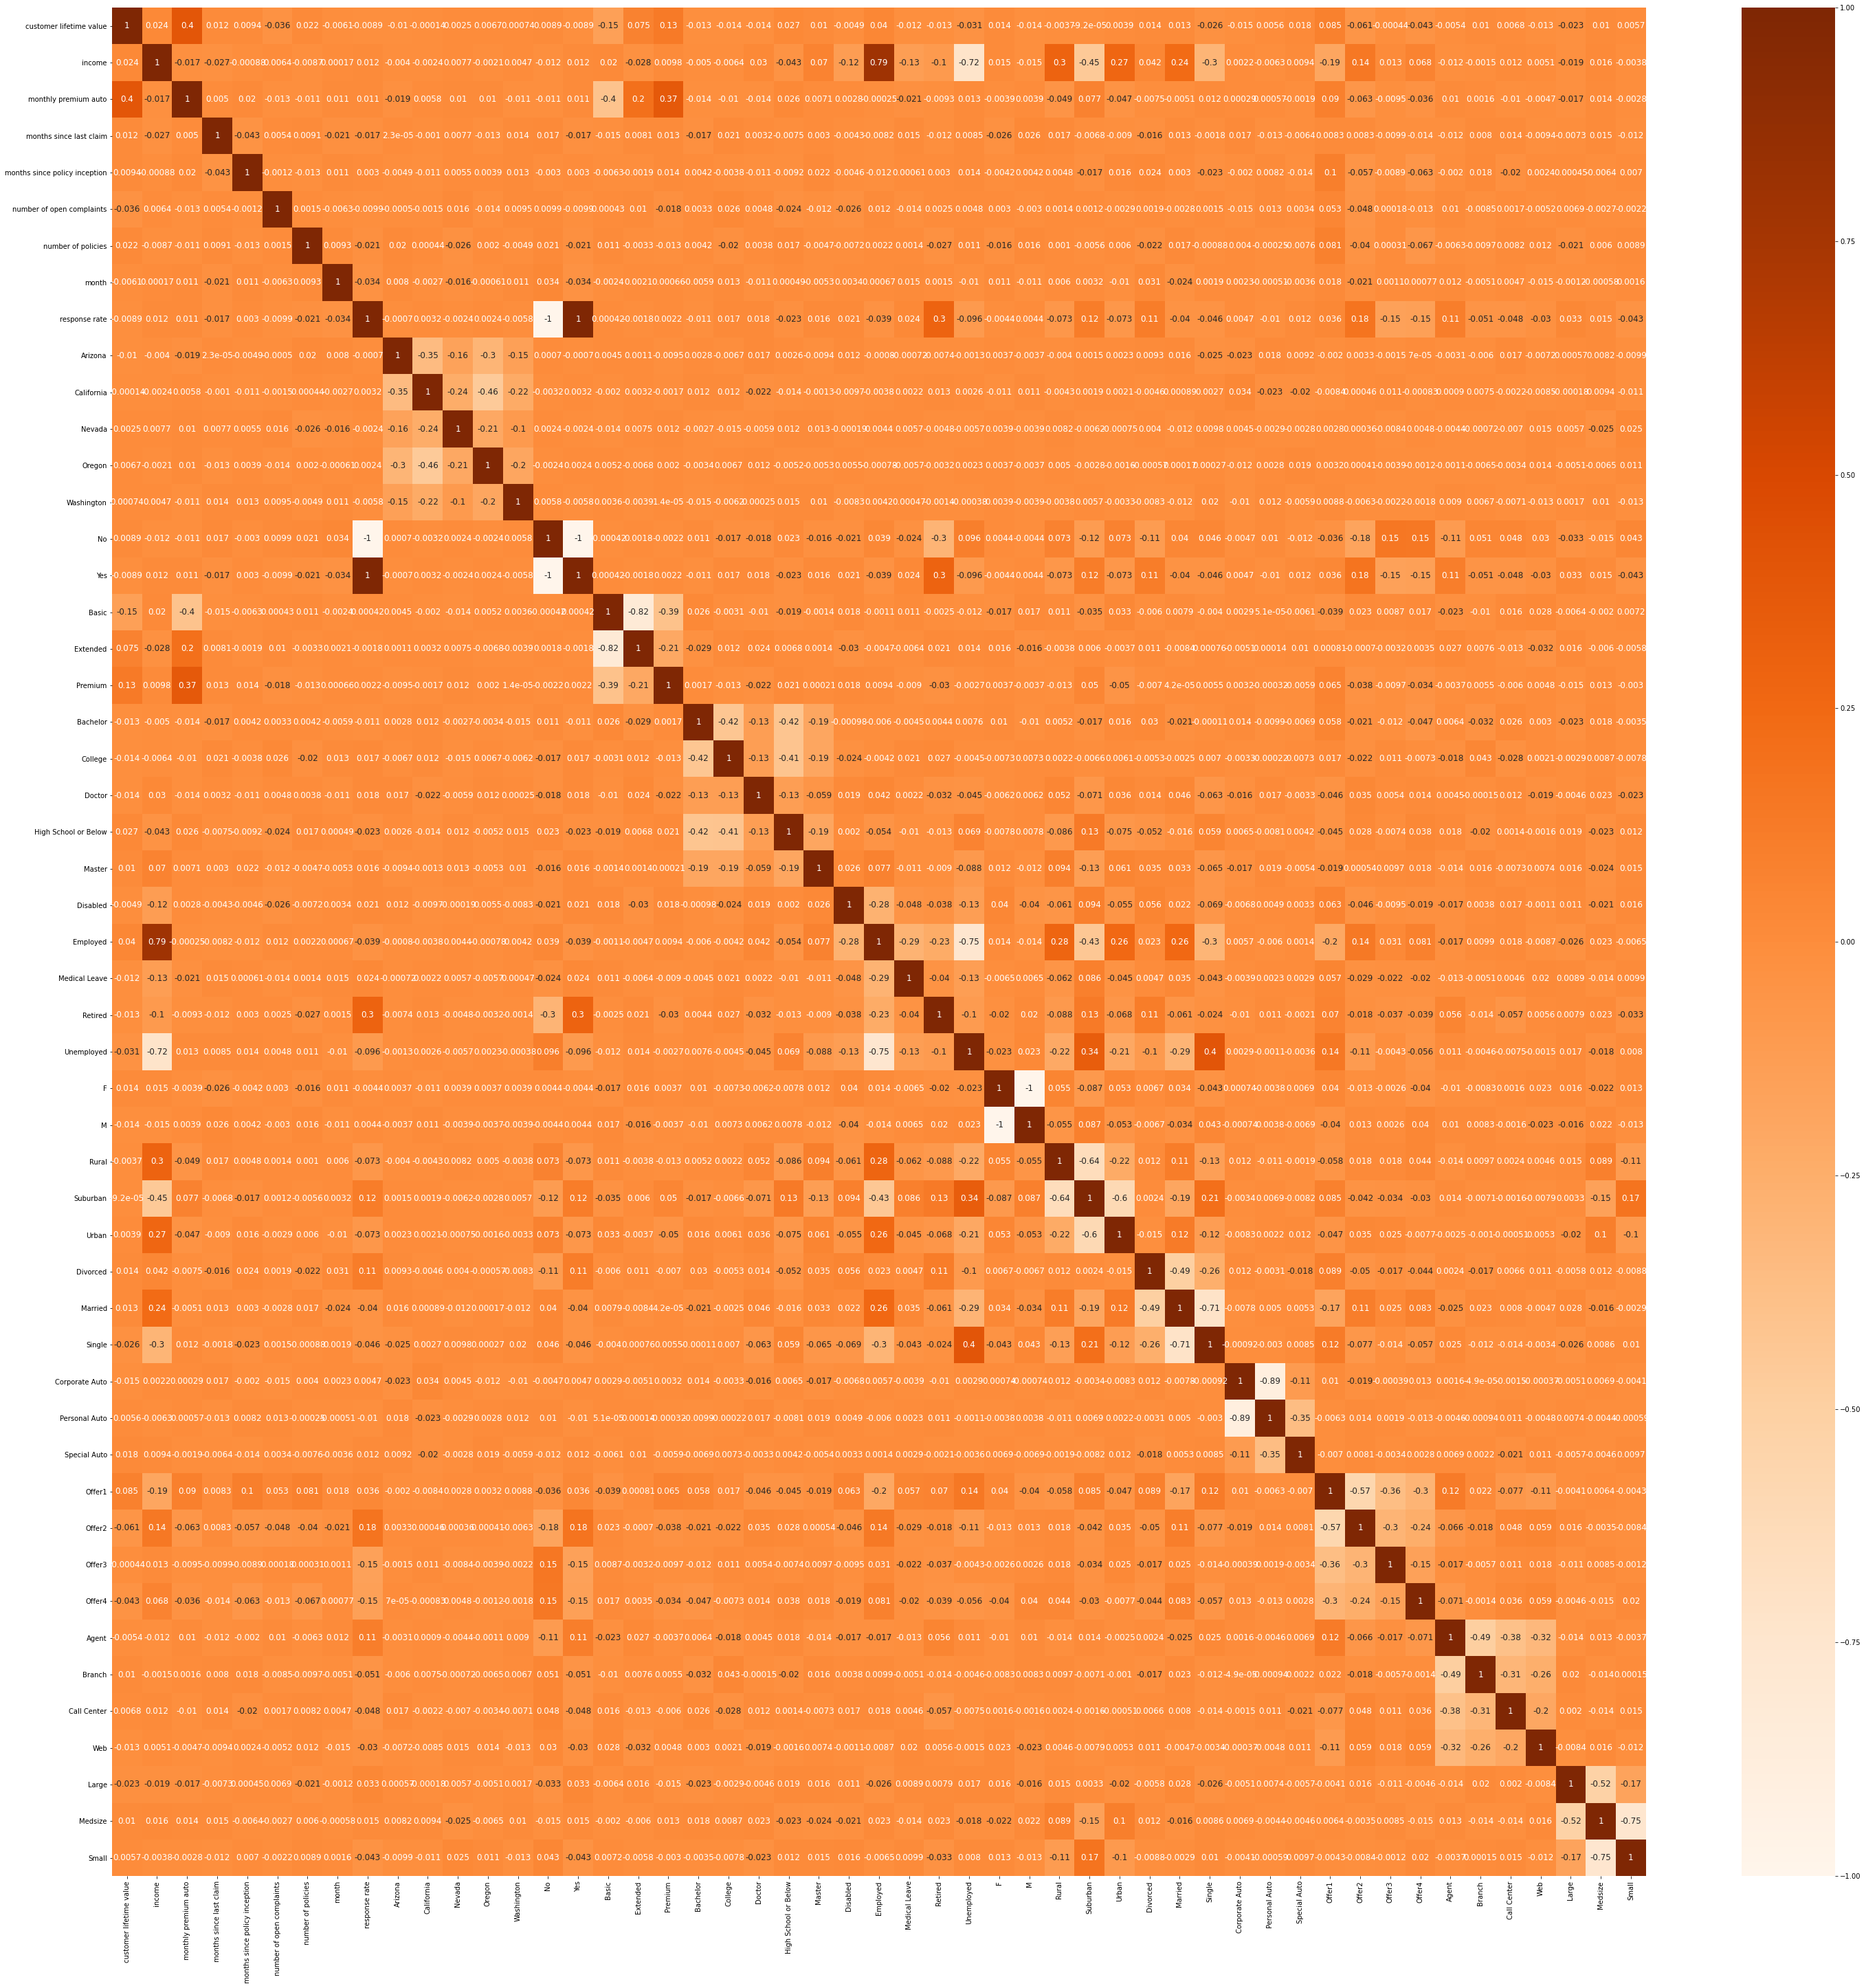

In [57]:
# review the correlation matrix and filter out features that do not offer a high correlation to the target or are redundant
correlation_matrix

# create new correlation matrix with full encoded data frame and labels
correlation_matrix2 = encoded_customer_data2.corr()
plt.figure(figsize = (50,50))
newcorrframe = pd.concat([encoded_customer_data,y_numericals], axis=1)
heatmap = sns.heatmap(correlation_matrix2, cmap = 'Oranges', annot=True, annot_kws= {'size':12} )
heatmap


# The numerical features most correlated to the target 'total claim value' are:
1. customer lifetime value(23%)
2. monthly premium auto(63%)
# The categorical features most correlated with the target 'total claim value' are:
1. policy type(Premium (24%))
2. employment(Unemployed(33%))
3. marital status(Single(24%))
4. location code(Suburban(58%))

In [39]:
# create new data frame of reduced data
reduced_customer_data = encoded_customer_data[['customer lifetime value','monthly premium auto','Basic', 'Extended', 'Premium','Disabled',
       'Employed', 'Medical Leave', 'Retired', 'Unemployed','Rural',
       'Suburban', 'Urban','Divorced', 'Married', 'Single', 'F','M']]
reduced_customer_data.head()
encoded_customer_data.columns



Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'month',
       'response rate', 'Arizona', 'California', 'Nevada', 'Oregon',
       'Washington', 'No', 'Yes', 'Basic', 'Extended', 'Premium', 'Bachelor',
       'College', 'Doctor', 'High School or Below', 'Master', 'Disabled',
       'Employed', 'Medical Leave', 'Retired', 'Unemployed', 'F', 'M', 'Rural',
       'Suburban', 'Urban', 'Divorced', 'Married', 'Single', 'Corporate Auto',
       'Personal Auto', 'Special Auto', 'Offer1', 'Offer2', 'Offer3', 'Offer4',
       'Agent', 'Branch', 'Call Center', 'Web', 'Large', 'Medsize', 'Small'],
      dtype='object')

In [40]:
# make a new train test split with the reduced data
X_train2, X_test2, y_train2, y_test2 = train_test_split(reduced_customer_data, y_numericals, test_size = 0.2, random_state = 42)

In [63]:
# create new model and train on training data
Lr2 = LinearRegression()
Lr2.fit(X_train2, y_train2)

# make predictions
predicted_vals2 = Lr2.predict(X_train2)

# compare model scores
r2_2 = r2_score(y_train2,predicted_vals2)
rmse_2 = sqrt(mean_squared_error(y_train2, predicted_vals2))
print('Model 1 R2_Score: ', r2_2)
print('Model 2 R2_SCore: ', rmse_2)

Model 1 R2_Score:  0.7696005995242928
Model 2 R2_SCore:  140.39603855045166


In [65]:
# test new model and compare results
test_result2 = Lr2.predict(X_test2)

# evaluate performance
test_r2_2 = r2_score(y_test, test_result2)
test_rsme_2 = sqrt(mean_squared_error(y_test2, test_result2))
print('Model 1 test R2: ', test_r2)
print('Model 2 test R2: ', test_rsme_2)

Model 1 test R2:  0.7631935226496568
Model 2 test R2:  137.58866973053486


# Create two new Linear Regression models with the Standardized Numerical data (encoded_customer_data2)

In [43]:

# assign data for splitting
X = encoded_customer_data2
y = y_numericals

# split data into training and testing sets
X_traina, X_testa, y_traina, y_testa = train_test_split(X ,y, test_size = 0.2, random_state = 42)

In [44]:

# instantiate and train model on training data
Lr_a = LinearRegression()
Lr_a.fit(X_traina, y_traina)

# make predictions
predicted_vals_a = Lr_a.predict(X_traina)

# validate model on training data
model_score_a =Lr_a.score(X_traina, y_traina)
r2_a = r2_score(y_traina,predicted_vals_a)
rmse_a =  sqrt(mean_squared_error(y_traina, predicted_vals_a))

print(model_score_a)
print(r2_a)
print(rmse_a)

0.7725252099800476
0.7725252099800476
139.50212330342484


In [45]:
#test data and validate model on tested data

# predict using test data
test_results_a = Lr_a.predict(X_testa)

# evaluate model performance
test_r2_a = r2_score(y_testa, test_results_a)
test_rsme_a = sqrt(mean_squared_error(y_testa, test_results_a))

# View model scores
print(test_r2_a)
print(test_rsme_a)

0.7625659659961546
137.39951658401054


In [46]:
# create new data frame of reduced data
reduced_customer_data_2 = encoded_customer_data2[['customer lifetime value','monthly premium auto','Basic', 'Extended', 'Premium','Disabled',
       'Employed', 'Medical Leave', 'Retired', 'Unemployed','Rural',
       'Suburban', 'Urban','Divorced', 'Married', 'Single', 'F','M']]
reduced_customer_data_2.head()


customer lifetime value  monthly premium auto  Basic  Extended  Premium  \
0                -0.762878             -0.703925    1.0       0.0      0.0   
1                -0.149245              0.022691    0.0       1.0      0.0   
2                 0.710636              0.429596    0.0       0.0      1.0   
3                -0.052263              0.371467    1.0       0.0      0.0   
4                -0.755575             -0.587666    1.0       0.0      0.0   

   Disabled  Employed  Medical Leave  Retired  Unemployed  Rural  Suburban  \
0       0.0       1.0            0.0      0.0         0.0    0.0       1.0   
1       0.0       0.0            0.0      0.0         1.0    0.0       1.0   
2       0.0       1.0            0.0      0.0         0.0    0.0       1.0   
3       0.0       0.0            0.0      0.0         1.0    0.0       1.0   
4       0.0       1.0            0.0      0.0         0.0    1.0       0.0   

   Urban  Divorced  Married  Single    F    M  
0    0.0       0.0      1.0     0.0  1.0  0.0  
1    0.0       0.0      0.0     1.0  1.0  0.0  
2    0.0       0.0      1.0     0.0  1.0  0.0  
3    0.0       0.0      1.0     0.0  0.0  1.0  
4    0.0       0.0      0.0     1.0  0.0  1.0

In [47]:
# assign data for splitting
X = reduced_customer_data_2
y = y_numericals

# split data into training and testing sets
X_trainb, X_testb, y_trainb, y_testb = train_test_split(X ,y, test_size = 0.2, random_state = 42)

In [48]:
# instantiate and train model on training data
Lr_b = LinearRegression()
Lr_b.fit(X_trainb, y_trainb)

# make predictions
predicted_vals_b = Lr_b.predict(X_trainb)

# validate model on training data
model_score_b =Lr_b.score(X_trainb, y_trainb)
r2_b = r2_score(y_trainb,predicted_vals_b)
rmse_b =  sqrt(mean_squared_error(y_trainb, predicted_vals_b))

print(model_score_b)
print(r2_b)
print(rmse_b)

0.7698152575999446
0.7698152575999446
140.3306213527438


In [49]:
#test data and validate model on tested data

# predict using test data
test_results_b = Lr_b.predict(X_testb)

# evaluate model performance
test_r2_b = r2_score(y_testb, test_results_b)
test_rsme_b = sqrt(mean_squared_error(y_testb, test_results_b))

# View model scores
print(test_r2_b)
print(test_rsme_b)

0.761933731246575
137.58232735518354


# Report performance of Models

In [68]:
# show model performance side by side to determine best performing model.
print(f'Model 1:\nR2 Score (train): {r2}\nRMSE (train): {rmse}\nR2 Score (test): {test_r2}\nRMSE (test): {test_rsme}\n')
print(f'Model 2:\nR2 Score (train): {r2_2}\nRMSE (train): {rmse_2}\nR2 Score (test): {test_r2_2}\nRMSE (test): {test_rsme_2}\n')
print(f'Model 3:\nR2 Score (train): {r2_a}\nRMSE (train): {rmse_a}\nR2 Score (test): {test_r2_a}\nRMSE (test): {test_rsme_a}\n')
print(f'Model 4:\nR2 Score (train): {r2_b}\nRMSE (train): {rmse_b}\nR2 Score (test): {test_r2_b}\nRMSE (test): {test_rsme_b}\n')

Model 1:
R2 Score (train): 0.7724933857194529
RMSE (train): 139.51188130047592
R2 Score (test): 0.7631935226496568
RMSE (test): 137.21781762897484

Model 2:
R2 Score (train): 0.7696005995242928
RMSE (train): 140.39603855045166
R2 Score (test): 0.7619117816187946
RMSE (test): 137.58866973053486

Model 3:
R2 Score (train): 0.7725252099800476
RMSE (train): 139.50212330342484
R2 Score (test): 0.7625659659961546
RMSE (test): 137.39951658401054

Model 4:
R2 Score (train): 0.7698152575999446
RMSE (train): 140.3306213527438
R2 Score (test): 0.761933731246575
RMSE (test): 137.58232735518354



# Conclusion
Model 1 appears to perform the best on both training and testing data.
This model was trained using the features scaled to a Minimum of 0 and a Maximum of 1.
The features used in training this model were:
'customer lifetime value',
'income',
'monthly premium auto',
'months since last claim', 
'months since policy inception',
'number of open complaints'
'number of policies', 
'month',
'response rate', 
'Arizona', 
'California', 
'Nevada', 
'Oregon',
'Washington', 
'No', 
'Yes', 
'Basic', 
'Extended', 
'Premium', 
'Bachelor',
'College', 
'Doctor', 
'High School or Below', 
'Master', 
'Disabled',
'Employed', 
'Medical Leave', 
'Retired', 
'Unemployed', 
'F', 
'M', 
'Rural',
'Suburban', 
'Urban', 
'Divorced', 
'Married', 
'Single', 
'Corporate Auto',
'Personal Auto', 
'Special Auto', 
'Offer1',        
'Offer2', 
'Offer3', 
'Offer4',
'Agent', 
'Branch', 
'Call Center', 
'Web', 
'Large', 
'Medsize', 
'Small'
